<a href="https://colab.research.google.com/github/NotMaj/Project-2-ML/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TASKS


-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [2]:
filename ='/content/supermarket_sales - Sheet1.csv'
df = pd.read_csv(filename)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Drop uncessecary columns
df.drop(columns=['Date','Time','Invoice ID'], inplace=True)

In [4]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

In [6]:
#Check for duplicates
df.duplicated().sum()

0

In [7]:
#Check if there are NaN values
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
# Check categorical columns with function
def unique_values_in_categories(dataframe):
    unique_values_dict = {}
    categorical_columns = dataframe.select_dtypes(include=['object', 'category'])

    for column in categorical_columns:
        unique_values_dict[column] = dataframe[column].unique().tolist()

    return unique_values_dict


In [10]:
categories = unique_values_in_categories(df)
categories

{'Branch': ['A', 'C', 'B'],
 'City': ['Yangon', 'Naypyitaw', 'Mandalay'],
 'Customer type': ['Member', 'Normal'],
 'Gender': ['Female', 'Male'],
 'Product line': ['Health and beauty',
  'Electronic accessories',
  'Home and lifestyle',
  'Sports and travel',
  'Food and beverages',
  'Fashion accessories'],
 'Payment': ['Ewallet', 'Cash', 'Credit card']}

<Axes: xlabel='Branch', ylabel='count'>

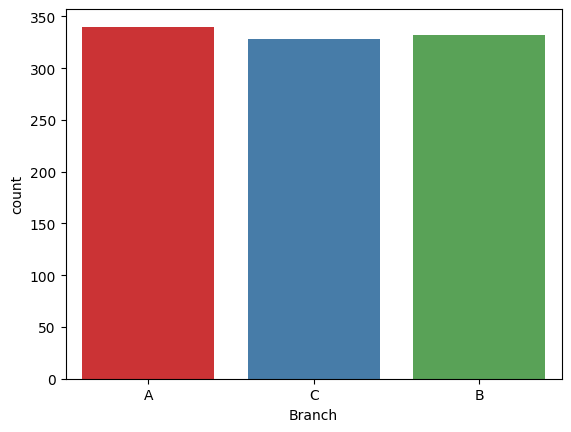

In [11]:
#Create univariate visuals for target and features

sns.countplot(data = df, x='Branch',palette="Set1")

<Axes: xlabel='City', ylabel='count'>

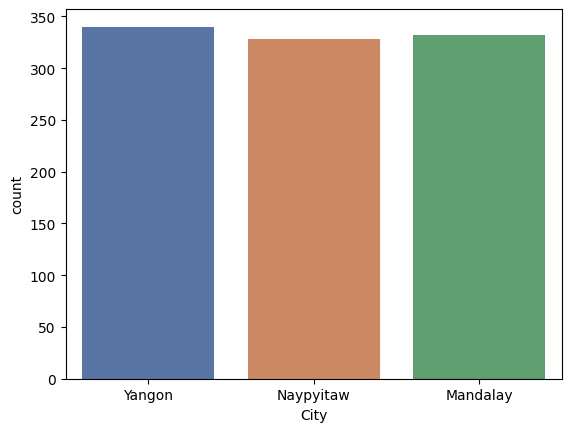

In [12]:
#City Count
sns.countplot(data = df, x='City',palette="deep")

<Axes: xlabel='Customer type', ylabel='count'>

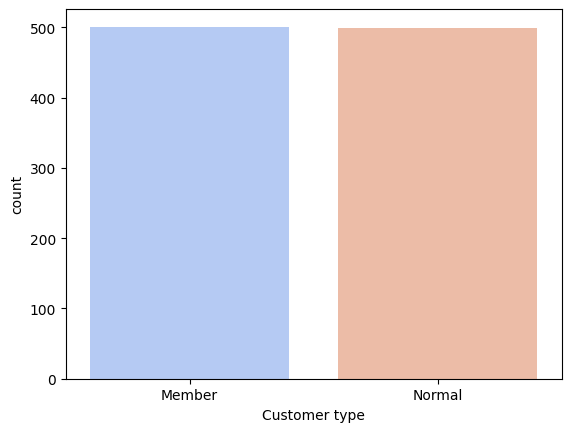

In [13]:
#Customer Type
sns.countplot(data = df, x='Customer type',palette='coolwarm')

<Axes: xlabel='Gender', ylabel='count'>

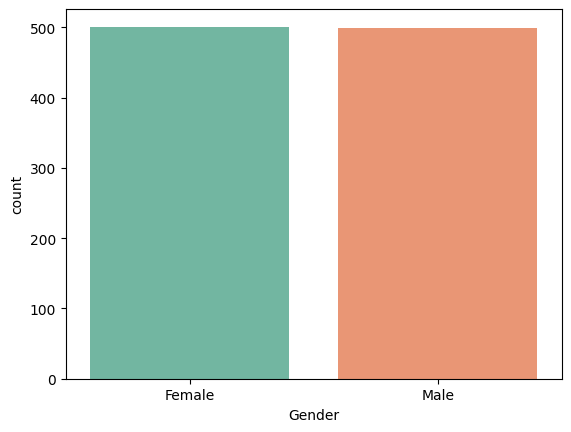

In [14]:
# Gender Countplot
sns.countplot(data = df, x='Gender', palette='Set2')

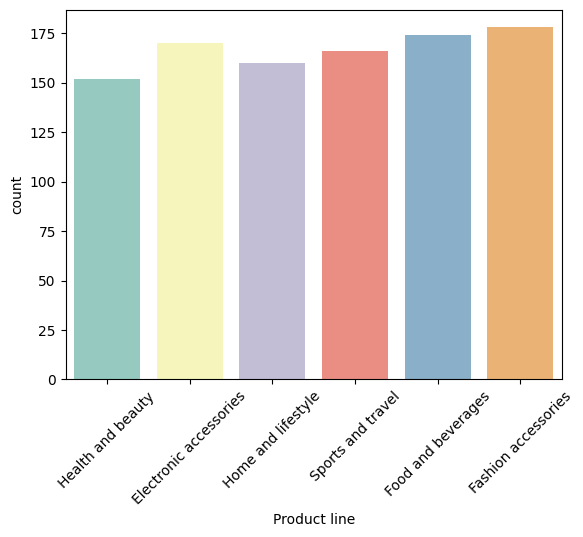

In [15]:
#Product line
sns.countplot(data = df, x='Product line',palette="Set3")
plt.xticks(rotation =45);

<Axes: xlabel='Payment', ylabel='count'>

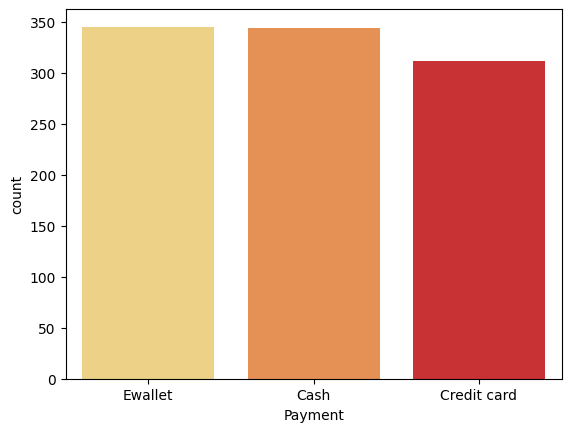

In [16]:
#Payment method
sns.countplot(data = df, x='Payment',palette="YlOrRd")

<ipython-input-17-f3f68257a1fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


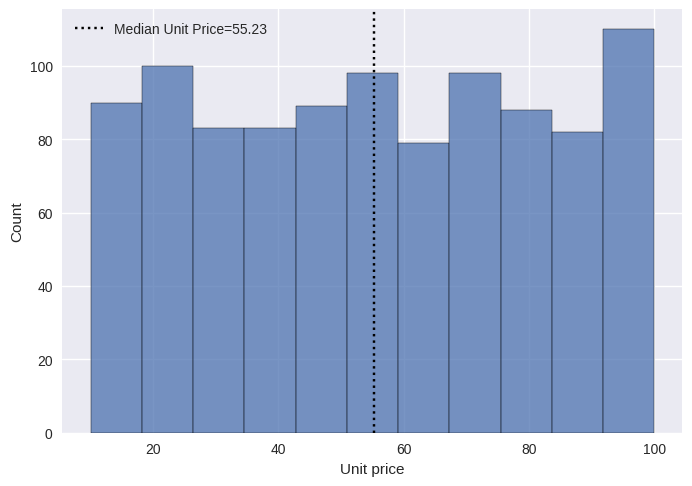

In [17]:
# Histogram for Unit Price
plt.style.use('seaborn')

ax = sns.histplot(df['Unit price'], bins='auto');

ax.set(xlabel='Unit price')


plt.axvline(df['Unit price'].median(),
            color="k",
            ls=":",
            label=f"Median Unit Price={round(df['Unit price'].median(),2)}");

plt.legend();

plt.show();

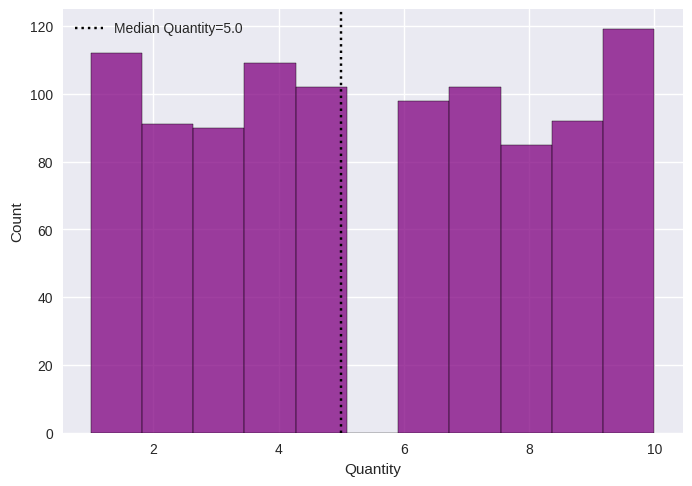

In [18]:
#Histogram for Quantity
sns.histplot(df['Quantity'], bins='auto', color ='purple');
plt.axvline(df['Quantity'].median(),
            color="k",
            ls=":",
            label=f"Median Quantity={round(df['Quantity'].median(),2)}");

plt.legend();

plt.show();

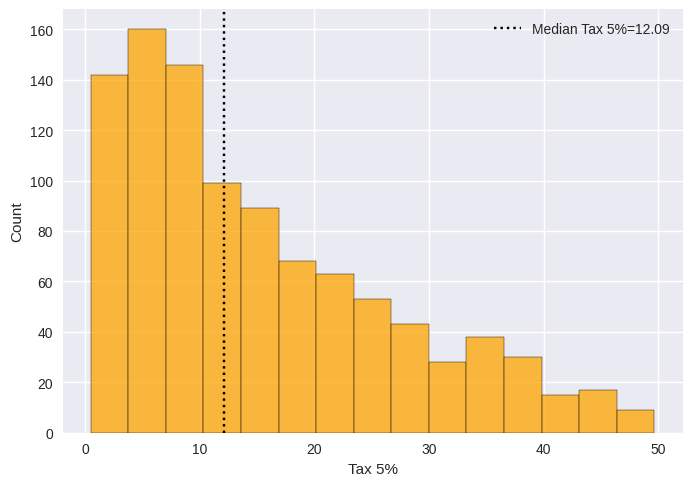

In [19]:
#Histogram for Tax 5%
sns.histplot(df['Tax 5%'], bins='auto', color ='orange');
plt.axvline(df['Tax 5%'].median(),
            color="k",
            ls=":",
            label=f"Median Tax 5%={round(df['Tax 5%'].median(),2)}");
plt.legend();

plt.show();

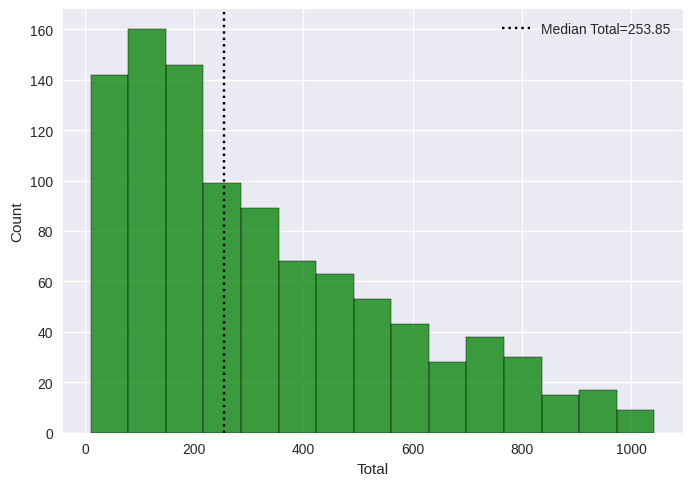

In [20]:
#Histogram for Total
sns.histplot(df['Total'], bins='auto', color ='green');
plt.axvline(df['Total'].median(),
            color="k",
            ls=":",
            label=f"Median Total={round(df['Total'].median(),2)}");
plt.legend();

plt.show();

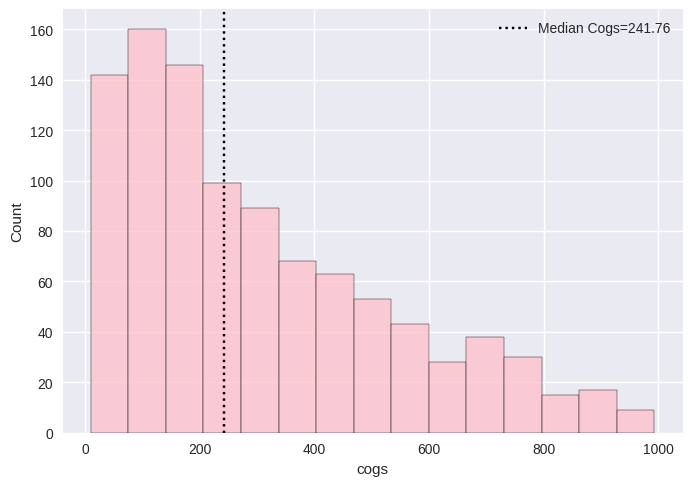

In [21]:
#Histogram for Cogs
sns.histplot(df['cogs'], bins='auto', color ='pink');
plt.axvline(df['cogs'].median(),
            color="k",
            ls=":",
            label=f"Median Cogs={round(df['cogs'].median(),2)}");
plt.legend();

plt.show();

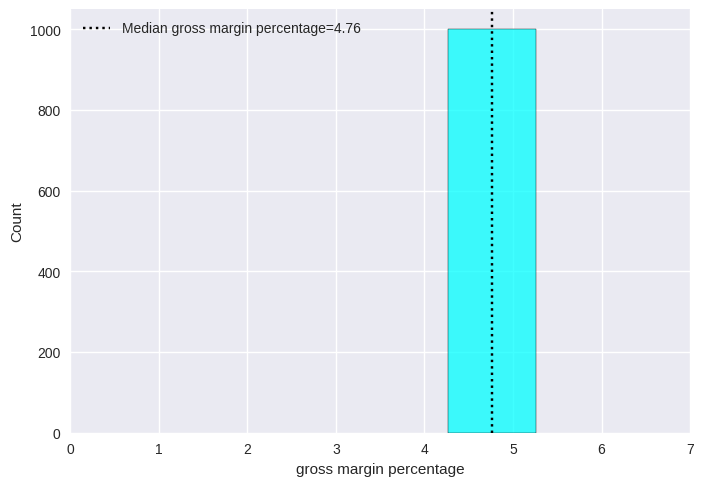

In [22]:
#Histogram for Gross Margin Percentage
sns.histplot(df['gross margin percentage'], bins='auto', color ='cyan');
plt.axvline(df['gross margin percentage'].median(),
            color="k",
            ls=":",
            label=f"Median gross margin percentage={round(df['gross margin percentage'].median(),2)}");
plt.xlim(0,7)

plt.legend();

plt.show();

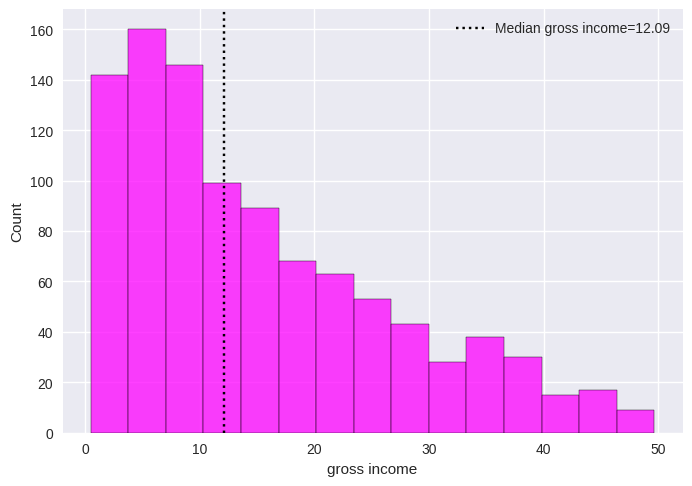

In [23]:
#Histogram for Gross Income
sns.histplot(df['gross income'], bins='auto', color ='magenta');
plt.axvline(df['gross income'].median(),
            color="k",
            ls=":",
            label=f"Median gross income={round(df['gross income'].median(),2)}");


plt.legend();

plt.show();

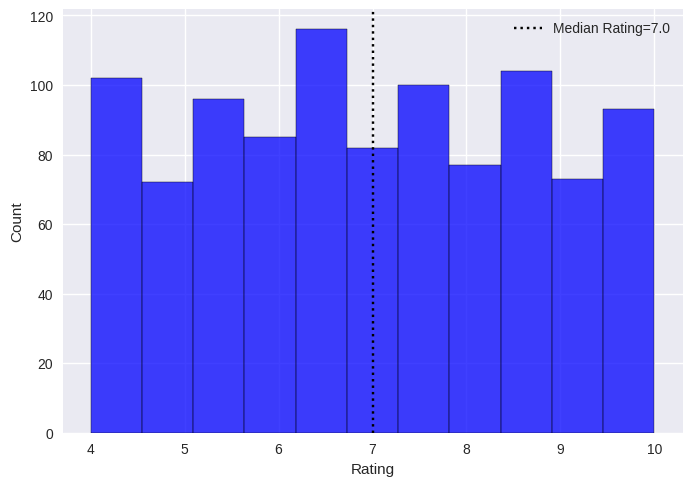

In [24]:
#Histogram for Rating
sns.histplot(df['Rating'], bins='auto', color ='blue');
plt.axvline(df['Rating'].median(),
            color="k",
            ls=":",
            label=f"Median Rating={round(df['Rating'].median(),2)}");


plt.legend();

plt.show();

<ipython-input-25-591da1a8c7c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


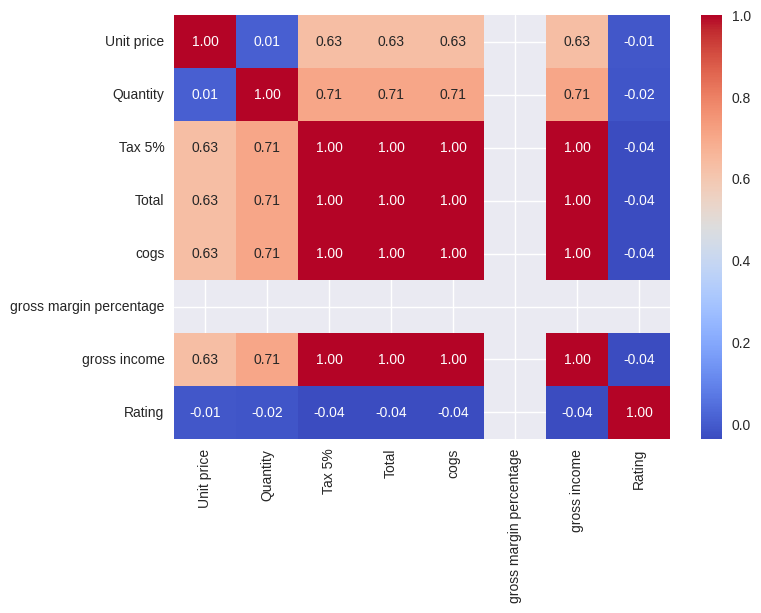

In [25]:
# Heatmap
corr =df.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt ='.2f');

There are multiple correlations present as show in the heatmap, with correlations from moderate to strong. Namely, Unit Price with the following other features of Tax 5%, Total, cogs, gross income with 63% correlation. Another is Quantity with gross income, cogs, Total and Tax 5% with 71% correlation.



In [26]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [88]:
df.shape

(1000, 14)

In [103]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector , make_column_transformer
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [97]:
#SPLIT THE DATA
# split X and y
# identify target y and features X
X = df.drop(columns=['gross income'])
y = df['gross income']


In [98]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [90]:
def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae:.2f},\n MSE {mse:.2f},\n RMSE: {rmse:.2f},\n R^2: {r2:.2f}')

In [91]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [92]:
# instantiate the encoders
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [93]:
# One-hot encode the categorical columns
ohe_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)


In [95]:
# Set scale the remaining columns
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')


In [99]:
# instantiate a linear regression model
lr = LinearRegression()

In [100]:
# combine the preprocessor object and the linear regression model in a pipeline
lr_pipe = make_pipeline(preprocessor, lr)


In [101]:
# fit your pipe on the training data
lr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bf354393b20>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bf3bd6cf250>)])),
                ('linearregression', LinearRegression())])

In [104]:
# find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, lr_pipe.predict(X_train))

print('\n Test Evaluation')
eval_model(y_test, lr_pipe.predict(X_test))

Train Evaluation
MAE 0.00,
 MSE 0.00,
 RMSE: 0.00,
 R^2: 1.00

 Test Evaluation
MAE 0.00,
 MSE 0.00,
 RMSE: 0.00,
 R^2: 1.00
